## Data from . csv files. 
#### Predicting if a pokemon is legendary or not, depending on various values from the dataset.
### Nadia H 

In [6]:
# Imports
# Pandas for structuring the data
import pandas as pd

# numpy for numerical analysis
import numpy as np

# matplotlib for diagrams inline with text
import matplotlib.pyplot as plt
%matplotlib inline 

#for generating random numbers
import random

# the most important library for machine learning algorithms
from sklearn import datasets, svm, tree, preprocessing, metrics


### Getting the data

In [34]:
# read the file into a pandas dataframe
df = pd.read_csv(r'C:\Users\nadia\OneDrive\Skrivebord\School\4.semester\BI\Data\archive\all_pokemon_data.csv', index_col=None, na_values=['NA', 'N/A', 'NULL'])

In [35]:
# see the size
df.shape

(1184, 24)

In [36]:
# see the different attribute labels 
list(df)

['Name',
 'National Dex #',
 'Primary Typing',
 'Secondary Typing',
 'Secondary Typing Flag',
 'Generation',
 'Legendary Status',
 'Form',
 'Alt Form Flag',
 'Evolution Stage',
 'Number of Evolution',
 'Color ID',
 'Catch Rate',
 'Height (dm)',
 'Weight (hg)',
 'Height (in)',
 'Weight (lbs)',
 'Base Stat Total',
 'Health',
 'Attack',
 'Defense',
 'Special Attack',
 'Special Defense',
 'Speed']

In [37]:
# Getting an overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1184 entries, 0 to 1183
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Name                   1184 non-null   object
 1   National Dex #         1184 non-null   int64 
 2   Primary Typing         1184 non-null   object
 3   Secondary Typing       654 non-null    object
 4   Secondary Typing Flag  1184 non-null   bool  
 5   Generation             1184 non-null   object
 6   Legendary Status       1184 non-null   bool  
 7   Form                   1184 non-null   object
 8   Alt Form Flag          1184 non-null   bool  
 9   Evolution Stage        1184 non-null   int64 
 10  Number of Evolution    1184 non-null   int64 
 11  Color ID               1184 non-null   object
 12  Catch Rate             1184 non-null   int64 
 13  Height (dm)            1184 non-null   int64 
 14  Weight (hg)            1184 non-null   int64 
 15  Height (in)          

In [38]:
# To see the first five records
df.head()

,Name,National Dex #,Primary Typing,Secondary Typing,Secondary Typing Flag,Generation,Legendary Status,Form,Alt Form Flag,Evolution Stage,...,Weight (hg),Height (in),Weight (lbs),Base Stat Total,Health,Attack,Defense,Special Attack,Special Defense,Speed
0,bulbasaur,1,grass,poison,True,generation-i,False,Base,False,1,...,69,28,15,318,45,49,49,65,65,45
1,ivysaur,2,grass,poison,True,generation-i,False,Base,False,2,...,130,39,29,405,60,62,63,80,80,60
2,venusaur,3,grass,poison,True,generation-i,False,Base,False,3,...,1000,79,220,525,80,82,83,100,100,80
3,venusaur-mega,3,grass,poison,True,generation-i,True,Mega,True,3,...,1555,94,343,625,80,100,123,122,120,80
4,charmander,4,fire,NaN,False,generation-i,False,Base,False,1,...,85,24,19,309,39,52,43,60,50,65


### Exploring the Data

In [41]:
# See the types of attributes
df.dtypes

Name                     object
National Dex #            int64
Primary Typing           object
Secondary Typing         object
Secondary Typing Flag      bool
Generation               object
Legendary Status           bool
Form                     object
Alt Form Flag              bool
Evolution Stage           int64
Number of Evolution       int64
Color ID                 object
Catch Rate                int64
Height (dm)               int64
Weight (hg)               int64
Height (in)               int64
Weight (lbs)              int64
Base Stat Total           int64
Health                    int64
Attack                    int64
Defense                   int64
Special Attack            int64
Special Defense           int64
Speed                     int64
dtype: object

In [42]:
# Getting insights of the value scope 
df.describe()

,National Dex #,Evolution Stage,Number of Evolution,Catch Rate,Height (dm),Weight (hg),Height (in),Weight (lbs),Base Stat Total,Health,Attack,Defense,Special Attack,Special Defense,Speed
count,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000
mean,494.978041,1.597128,2.108108,92.202703,12.829392,730.995777,50.535473,161.163851,441.633446,70.910473,80.989020,74.817568,72.922297,72.265203,69.728885
std,299.166288,0.700700,0.735618,75.715485,13.646223,1311.060248,53.682455,289.037497,119.296702,26.406800,31.955337,30.324208,32.426324,27.095940,30.110391
min,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,4.000000,0.000000,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,230.750000,1.000000,2.000000,45.000000,6.000000,89.750000,24.000000,20.000000,330.000000,52.000000,57.000000,52.000000,50.000000,51.000000,45.000000
50%,486.500000,1.000000,2.000000,60.000000,10.000000,300.000000,39.000000,66.000000,464.500000,70.000000,80.000000,70.000000,65.000000,70.000000,67.500000
75%,751.250000,2.000000,3.000000,127.000000,16.000000,775.500000,63.000000,171.250000,520.000000,85.000000,100.000000,91.000000,95.000000,90.000000,91.000000
max,1025.000000,3.000000,3.000000,255.000000,200.000000,9999.000000,787.000000,2204.000000,780.000000,255.000000,190.000000,230.000000,194.000000,230.000000,200.000000


In [ ]:
# Non-numeric data is not included in the statistic above, but can be plotted
df["Primary Typing"].value_counts().plot(kind='bar', figsize=(12,6), title="Primary Pokémon Types")

<Axes: title={'center': 'Secondary Pokémon Types'}, xlabel='Secondary Typing'>

In [ ]:
# Showing the kind of type combos there are
df["Type Combo"].unique()

array(['grass/poison', 'fire/None', 'fire/flying', 'fire/dragon',
       'water/None', 'bug/None', 'bug/flying', 'bug/poison',
       'normal/flying', 'normal/None', 'dark/normal', 'poison/None',
       'electric/None', 'electric/psychic', 'ground/None', 'ice/steel',
       'poison/ground', 'fairy/None', 'ice/None', 'ice/fairy',
       'normal/fairy', 'poison/flying', 'bug/grass', 'ground/steel',
       'dark/None', 'steel/None', 'fighting/None', 'fire/rock',
       'water/fighting', 'psychic/None', 'water/poison', 'rock/ground',
       'rock/electric', 'psychic/fairy', 'water/psychic',
       'poison/psychic', 'electric/steel', 'water/ice', 'poison/dark',
       'ghost/poison', 'electric/grass', 'grass/psychic', 'grass/dragon',
       'fire/ghost', 'poison/fairy', 'ground/rock', 'grass/None',
       'ice/psychic', 'fighting/fire', 'fighting/water', 'water/flying',
       'water/dark', 'rock/water', 'rock/flying', 'ice/flying',
       'psychic/flying', 'electric/flying', 'fighting/flyi

In [ ]:
# Saving combo in a new cell in the main DataFrame
df["Type Combo"] = df["Primary Typing"] + "/" + df["Secondary Typing"].fillna("None")

In [48]:
type_counts = df["Primary Typing"] + "/" + df["Secondary Typing"].fillna("None")
type_counts.value_counts().head(10)


water/None       79
normal/None      79
grass/None       47
psychic/None     43
electric/None    37
fire/None        37
fighting/None    30
normal/flying    28
bug/None         23
fairy/None       22
Name: count, dtype: int64

In [ ]:
# Shows how many Pokémon exist for each unique Primary/Secondary type combination (e.g., Fire/Flying, Water/None, etc.)
df["Type Combo"].value_counts()

# Calculates the average Base Stat Total for each type combo, helping identify which combinations are generally stronger overall.
df.groupby("Type Combo")["Base Stat Total"].mean()

# Filters the dataset to only show Pokémon whose type combo is exactly Fire/Flying.
df[df["Type Combo"] == "fire/flying"]


,Name,National Dex #,Primary Typing,Secondary Typing,Secondary Typing Flag,Generation,Legendary Status,Form,Alt Form Flag,Evolution Stage,...,Height (in),Weight (lbs),Base Stat Total,Health,Attack,Defense,Special Attack,Special Defense,Speed,Type Combo
6,charizard,6,fire,flying,True,generation-i,False,Base,False,3,...,67,200,534,78,84,78,109,85,100,fire/flying
8,charizard-mega-y,6,fire,flying,True,generation-i,True,Mega Y,True,3,...,67,222,634,78,104,78,159,115,100,fire/flying
197,moltres,146,fire,flying,True,generation-i,True,Base,False,1,...,79,132,580,90,100,90,125,85,90,fire/flying
316,ho-oh,250,fire,flying,True,generation-ii,True,Base,False,1,...,150,439,680,106,130,90,110,154,90,fire/flying
784,fletchinder,662,fire,flying,True,generation-vi,False,Base,False,2,...,28,35,382,62,73,55,56,52,84,fire/flying
785,talonflame,663,fire,flying,True,generation-vi,False,Base,False,3,...,47,54,499,78,81,71,74,69,126,fire/flying
873,oricorio-baile,741,fire,flying,True,generation-vii,False,Base,False,1,...,24,7,476,75,70,70,98,70,93,fire/flying


In [ ]:
# Checking how many pokemon have primary types
df["Primary Typing"].notna().sum()

1184

In [58]:
# Checking how many have secondary types
df["Secondary Typing"].notna().sum()

654

In [ ]:
# Checking how many pokemon that don't have a secondary type (NULL values)
df["Secondary Typing"].isna().sum()

530

In [ ]:
# Seeing percentages
total = len(df)
has_secondary = df["Secondary Typing"].notna().sum()
no_secondary = df["Secondary Typing"].isna().sum()

print("With Secondary:", has_secondary, f"({has_secondary/total:.1%})")
print("Without Secondary:", no_secondary, f"({no_secondary/total:.1%})")


With Secondary: 654 (55.2%)
Without Secondary: 530 (44.8%)


### Preparing data for analysis

In [ ]:
# Count the missing values of each attributes
df.isnull().sum()

In [63]:
# Fill missing secondary types with "None"
df["Secondary Typing"] = df["Secondary Typing"].fillna("None")

In [65]:
# Dropping non-informative columns
df = df.drop(['Form', 'Alt Form Flag', 'Color ID'], axis=1)

In [ ]:
# Checking to see if there are missing values on evolutions
df.isnull().sum()

# No need to fill missing values: all important columns are complete.
# Only 'Secondary Typing' had missing values, which we've filled with 'None'.

Name                     0
National Dex #           0
Primary Typing           0
Secondary Typing         0
Secondary Typing Flag    0
Generation               0
Legendary Status         0
Evolution Stage          0
Number of Evolution      0
Catch Rate               0
Height (dm)              0
Weight (hg)              0
Height (in)              0
Weight (lbs)             0
Base Stat Total          0
Health                   0
Attack                   0
Defense                  0
Special Attack           0
Special Defense          0
Speed                    0
Type Combo               0
dtype: int64

In [ ]:
# Seeing count, making sure nothing is in a null state. 
df.count()


Name                     1184
National Dex #           1184
Primary Typing           1184
Secondary Typing         1184
Secondary Typing Flag    1184
Generation               1184
Legendary Status         1184
Evolution Stage          1184
Number of Evolution      1184
Catch Rate               1184
Height (dm)              1184
Weight (hg)              1184
Height (in)              1184
Weight (lbs)             1184
Base Stat Total          1184
Health                   1184
Attack                   1184
Defense                  1184
Special Attack           1184
Special Defense          1184
Speed                    1184
Type Combo               1184
dtype: int64

### Transforming Data into numeric

In [73]:
# Defining a function to transform all categorial columns into numeric, using naming LabelEncoder
def preprocessor(df):
    processed_df = df.copy() # Making a copy, so the original doesn't change.
    le = preprocessing.LabelEncoder() # Creating a label encoder instance.

    # Convert text types into numbers
    processed_df['Primary Typing'] = le.fit_transform(df['Primary Typing'])
    processed_df['Secondary Typing'] = le.fit_transform(df['Secondary Typing'])
    processed_df['Generation'] = le.fit_transform(df['Generation'])

    # Drop non-informative columns (keep 'Name' for reference) - IF they exist
    processed_df = processed_df.drop(['Form', 'Alt Form Flag', 'Color ID'], axis=1, errors='ignore')
    
    return processed_df

In [74]:
# Apply the transformation function to get the processed dataset
dfp = preprocessor(df)

In [76]:
# Convert boolean columns to integers so the model can use them
# Drop 'Type Combo' because it's still a string, and not needed for prediction

# Convert boolean columns to integers
dfp['Legendary Status'] = dfp['Legendary Status'].astype(int)
dfp['Secondary Typing Flag'] = dfp['Secondary Typing Flag'].astype(int)
dfp['Evolution Stage'] = dfp['Evolution Stage'].astype(int)

# Droppint type combo
dfp = dfp.drop("Type Combo", axis=1)

#### I have chosen to keep the name, and just exclude this column, when training the model. Keeping the names of the pokemon was purely for me, if I wanted to use the pokemon dataset for another kind of data analysis.

In [79]:
# Show the first few rows of processed dataset
dfp.head()

,Name,National Dex #,Primary Typing,Secondary Typing,Secondary Typing Flag,Generation,Legendary Status,Evolution Stage,Number of Evolution,Catch Rate,...,Weight (hg),Height (in),Weight (lbs),Base Stat Total,Health,Attack,Defense,Special Attack,Special Defense,Speed
0,bulbasaur,1,9,14,1,0,0,1,3,45,...,69,28,15,318,45,49,49,65,65,45
1,ivysaur,2,9,14,1,0,0,2,3,45,...,130,39,29,405,60,62,63,80,80,60
2,venusaur,3,9,14,1,0,0,3,3,45,...,1000,79,220,525,80,82,83,100,100,80
3,venusaur-mega,3,9,14,1,0,1,3,3,45,...,1555,94,343,625,80,100,123,122,120,80
4,charmander,4,6,0,0,0,0,1,3,45,...,85,24,19,309,39,52,43,60,50,65


In [80]:
# Checking for any missing values in the processed dataset
dfp.isnull().sum()

Name                     0
National Dex #           0
Primary Typing           0
Secondary Typing         0
Secondary Typing Flag    0
Generation               0
Legendary Status         0
Evolution Stage          0
Number of Evolution      0
Catch Rate               0
Height (dm)              0
Weight (hg)              0
Height (in)              0
Weight (lbs)             0
Base Stat Total          0
Health                   0
Attack                   0
Defense                  0
Special Attack           0
Special Defense          0
Speed                    0
dtype: int64

### Train a model!

In [81]:
# Split the data into input (X) and target (y)
# Drop 'Legendary Status' from features and keep it as the label
X = dfp.drop(['Legendary Status', 'Name'], axis=1).values
y = dfp['Legendary Status'].values

In [82]:
# Split the data into training and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [83]:
# Import and create a decision tree model
dt = tree.DecisionTreeClassifier(max_depth=3)

# Train the model on the training data
dt.fit(X_train, y_train)

# Check how accurate it is on the test data
dt.score(X_test, y_test)


0.9704641350210971

In [84]:
# Random forest classifier 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9662447257383966

In [85]:
# Gradient boosting classifier (slow but accurate)
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=50)
gb.fit(X_train, y_train)
gb.score(X_test, y_test)

0.9746835443037974

In [86]:
# Combining the three models into one for better performance
from sklearn.ensemble import VotingClassifier
eclf = VotingClassifier([('dt', dt), ('rf', rf), ('gb', gb)])
eclf.fit(X_train, y_train)
eclf.score(X_test, y_test)

0.9789029535864979

### Predictions

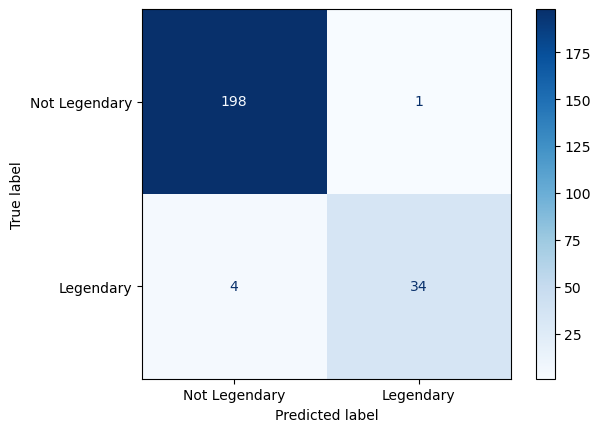

In [89]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Show how many Pokémon were correctly and incorrectly predicted using a confusion matrix

# Telling to predict using the best model (voting classifier)
y_pred = eclf.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Legendary", "Legendary"])
disp.plot(cmap="Blues")
plt.show()

#### This confusion matrix shows how well the model predicted whether a Pokémon was "Legendary" or "Not Legendary." The model made 198 correct predictions for "Not Legendary" and 34 correct predictions for "Legendary." There were 4 incorrect predictions where "Not Legendary" was predicted as "Legendary" and 1 where "Legendary" was predicted as "Not Legendary." Overall, the model did a good job at predicting.

In [90]:
# Show which predictions were correct and which were wrong using a confusion matrix

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=["Not Legendary", "Legendary"]))

               precision    recall  f1-score   support

Not Legendary       0.98      0.99      0.99       199
    Legendary       0.97      0.89      0.93        38

     accuracy                           0.98       237
    macro avg       0.98      0.94      0.96       237
 weighted avg       0.98      0.98      0.98       237



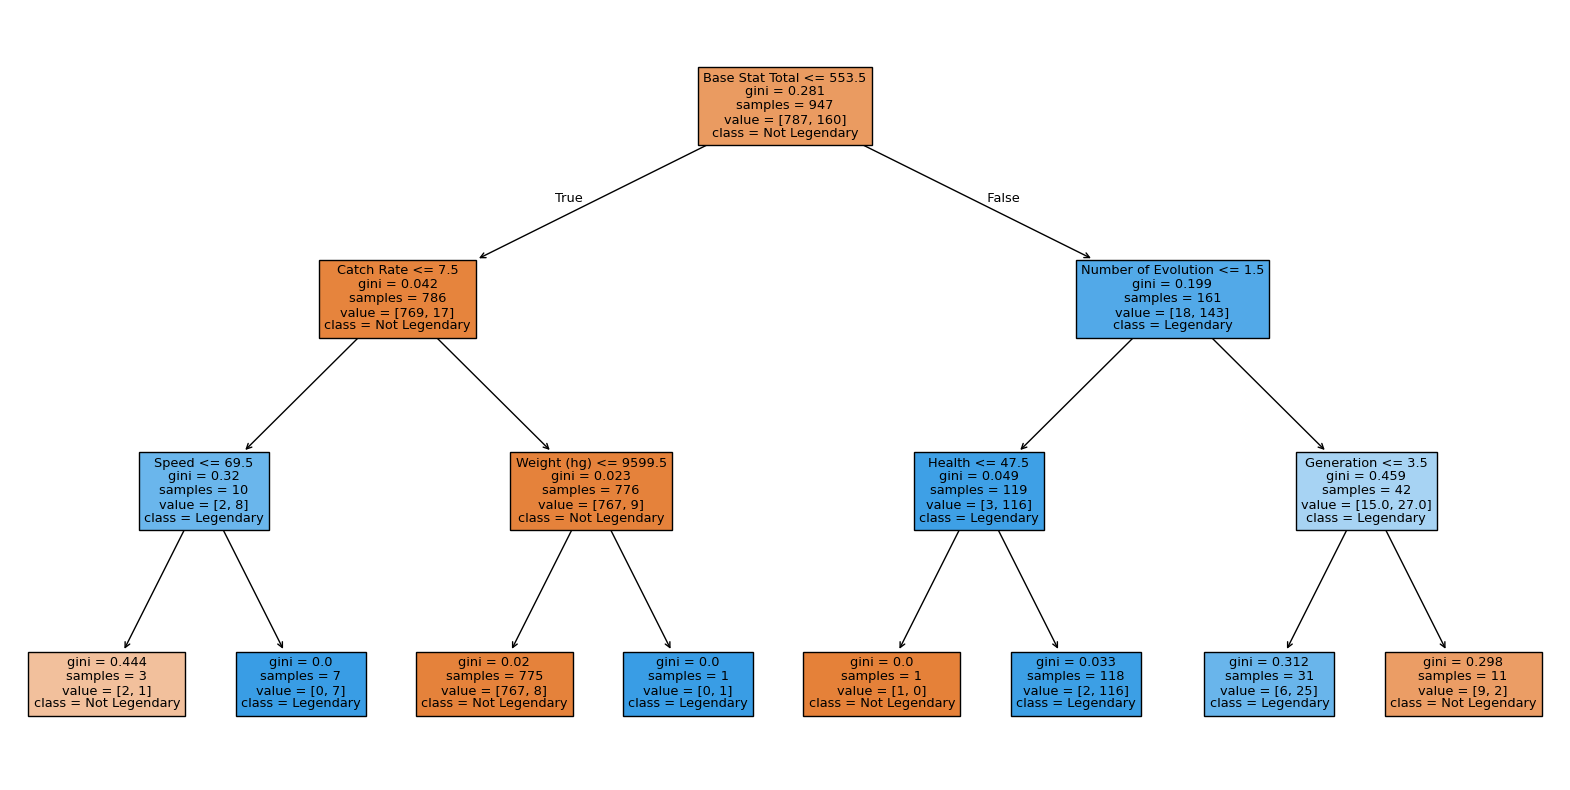

In [91]:
# Visualizing the decision tree logic used by the model

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
tree.plot_tree(dt, feature_names=dfp.drop(['Legendary Status', 'Name'], axis=1).columns, class_names=["Not Legendary", "Legendary"], filled=True)
plt.show()


### This decision tree classifies Pokémon as "Legendary" or "Not Legendary" based on various features, such as "Base Stat Total," "Catch Rate," "Health," and "Number of Evolutions." The tree splits the data at key thresholds to make predictions, providing insight into the model's decision-making process.








### Evaluating the performance with new data

In [93]:
# Testing with my 'own' pokemon. 
# Input data for Charmander:

pokemon_input = [[
    1,  # Primary Typing (fire)
    0,  # Secondary Typing (None)
    0,  # Secondary Typing Flag (False)
    0,  # Generation (example)
    0,  # Legendary Status (False)
    3,  # Evolution Stage (example)
    3,  # Number of Evolution
    45,  # Catch Rate
    10,  # Height (in dm)
    30,  # Weight (in hg)
    40,  # Height (in inches)
    88,  # Weight (in lbs)
    600,  # Base Stat Total
    50,  # Health
    55,  # Attack
    45,  # Defense
    80,  # Special Attack
    70,  # Special Defense
    80,  # Speed
]] 

# Use the trained Voting Classifier model (eclf) to make the prediction
prediction = eclf.predict(pokemon_input)

# Show the result: "Legendary" or "Not Legendary"
print("Prediction for Pokémon:", "Legendary" if prediction[0] == 1 else "Not Legendary")


Prediction for Pokémon: Not Legendary


#### This code tests the AI model with input data for Charmander. The model uses the trained Voting Classifier to predict if Charmander is "Legendary" or "Not Legendary" based on various attributes like Primary Typing, Catch Rate, Health, Attack, and others. In this case, the prediction result shows "Not Legendary," indicating that Charmander is classified as a non-legendary Pokémon based on the provided features.